In [1249]:
!pip install countryinfo
!pip install missingno
import pandas as pd
import numpy as np
import missingno as msno
import re
import math
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 16)
from datetime import date
from pandas_profiling.utils.cache import cache_file

In [1250]:
conda install opencv 

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done


# All requested packages already installed.



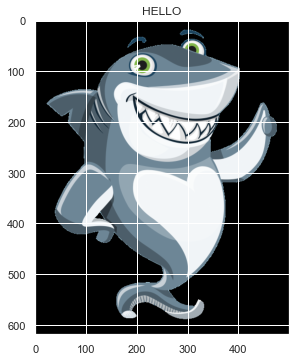

In [1251]:
import cv2
binary = cv2.imread('kisspng.png')
binary.shape
plt.figure(figsize=[10,10])
plt.imshow(binary[:,:,::-1])
plt.subplot(122)
plt.imshow(binary[:,:,::-1])
plt.title("HELLO")
plt.show()

In [1252]:
db = pd.read_csv('attacks.csv', encoding='cp1252')
len(db)

25723

## 1. First visualitation

In [1253]:
db.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303,NaN,NaN
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302,NaN,NaN
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301,NaN,NaN
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300,NaN,NaN
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299,NaN,NaN


## 2. Drop duplicates rows

In [1254]:
db.drop_duplicates()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303,NaN,NaN
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302,NaN,NaN
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301,NaN,NaN
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300,NaN,NaN
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309,NaN,NaN
6308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310,NaN,NaN
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Checking null data, how many empty cells there are in every column.

In [1255]:
#True=1; suma los 1
null_cols = db.isnull().sum()
null_cols

Case Number       17021
Date              19421
Year              19423
Type              19425
Country           19471
                  ...  
Case Number.1     19421
Case Number.2     19421
original order    19414
Unnamed: 22       25722
Unnamed: 23       25721
Length: 24, dtype: int64

## 4. No duplicates, len remains the same (25,723)

In [1256]:
len(db)

25723

## 5. Show columns of db that have NaN values

In [1257]:
def null_cols(db):
    nulls = db.isna().sum()
    return nulls[nulls > 0] / len(db) * 100
null_cols(db)

Case Number        66
Date               76
Year               76
Type               76
Country            76
                 ... 
Case Number.1      76
Case Number.2      76
original order     75
Unnamed: 22       100
Unnamed: 23       100
Length: 24, dtype: float64

## 6. Deleting blank spaces

In [1258]:
db.columns = db.columns.str.rstrip()
db['Sex']= db['Sex'].str.strip()
db['Country']= db['Country'].str.strip()
db['Age']= db['Age'].str.strip()
db['Case Number']= db['Case Number'].str.strip()
db['Fatal (Y/N)']= db['Fatal (Y/N)'].str.strip()
db['Activity']= db['Activity'].str.strip()
db

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303,NaN,NaN
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302,NaN,NaN
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301,NaN,NaN
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300,NaN,NaN
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 7. Check if 'Case Number' contains the same info as "Case Number.1" & "Case Number.2"

In [1259]:
((db["Case Number"] == db["Case Number.1"]) & (db["Case Number"] == db["Case Number.2"])).value_counts()

False    19448
True      6275
dtype: int64

In [1260]:
db=db[(db["Case Number"] == db["Case Number.1"]) & (db["Case Number"] == db["Case Number.2"])]
db
db[db['Case Number']==0]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23


In [1261]:
#db.drop(columns = ["Case Number.1"], inplace = True)

In [1262]:
#db.drop(columns = ["Case Number.2"], inplace = True)

In [1263]:
db.drop(columns = ["Case Number.1", "Case Number.2"], inplace = True)

C:\Users\pinil\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [1264]:
db.reset_index()
db.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6303,NaN,NaN
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6302,NaN,NaN
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6301,NaN,NaN
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6300,NaN,NaN
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6299,NaN,NaN


## 8. Unnamed: 22" and "Unnamed: 23" are mostly empty. Let's examine what they contain

In [1265]:
db['Unnamed: 22'].fillna(0, inplace=True)
[x for x in db['Unnamed: 22'] if x!=0]

C:\Users\pinil\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


['stopped here']

In [1266]:
db['Unnamed: 23'].fillna(0, inplace=True)
[y for y in db['Unnamed: 23'] if y!=0]

['Teramo', 'change filename']

### We will drop Unmamed:22, only contain 'stopped here'/ Unmamed:23, only contain 'Teramo' & 'change filename'

In [1267]:
db.drop(columns = ["Unnamed: 22", "Unnamed: 23"], inplace = True)

C:\Users\pinil\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## 9. Let's check how many different values contain this two columns in order to drop one of them

In [1268]:
(db["href formula"] != db["href"]).value_counts()

False    6216
True       59
dtype: int64

### Searching missing values in 'href formula' which is present in 'href':

In [1269]:
((db["href formula"]).isna()).value_counts()

False    6274
True        1
Name: href formula, dtype: int64

In [1270]:
((db["href"]).isnull()).value_counts()

False    6275
Name: href, dtype: int64

In [1271]:
((db["href formula"] != db["href"]) & (db["href formula"]).isna()).value_counts()

False    6274
True        1
dtype: int64

### Dropping href

In [1272]:
db.drop(columns = ["href"], inplace = True)

## 10. ‘all’ : If all values are NaN, drop that row or column.

In [1273]:
db = db.dropna(how='all')
len(db)
#db = db.dropna() dropea todo si algún valor es NaN

6275

## 11. Reindexing dataframe

In [1274]:
db.reset_index(drop=True)
db.head(1)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,original order
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6303


## 12. Let's have a look to Age and Sex columns

In [1275]:
print(db['Age'].dtypes)

object


### Checking NaN rows

In [1276]:
NaN_rows_Age=db["Age"].isna().sum()
print('NaN rows Age:')
print(NaN_rows_Age)
null_rows_Age = db['Age'].isnull().sum()
print(null_rows_Age)
db.Age.dropna(inplace=True)

NaN rows Age:
2815
2815


In [1277]:
print(set(db['Age']))

{'', '25 to 35', '86', '13', '70', 'Teens', '31 or 33', '40', '25', '67', '6½', '26', '34', 'Ca. 33', '17 & 35', '35', '43', 'teen', '28, 23 & 30', '52', '14', '34 & 19', '18 or 20', '31', '46', '84', '9 months', '21', '30s', '40s', '? & 19', '7      &    31', '53', '56', '60s', '49', 'mid-30s', "60's", 'adult', '36', '10 or 12', '50 & 30', '18 months', 'Elderly', '17', '20s', '3', '71', '38', '20', '74', '7', '10', '50s', '9', '65', '37', '30 or 36', '2½', '9 or 10', 'young', '41', '69', '42', '18', '75', '>50', '45', '28 & 26', '19', '?    &   14', '73', '21 or 26', '50', '18 to 22', '11', '5', '62', '6', '24', '15', '57', '46 & 34', '"young"', 'mid-20s', '25 or 28', '37, 67, 35, 27,  ? & 27', '51', '12', '32', '77', '33 & 26', 'MAKE LINE GREEN', '36 & 23', 'A.M.', '8 or 10', '23', '(adult)', '23 & 20', '78', '13 or 14', '68', '1', '8', '55', 'Teen', '63', '29', '82', '28', '72', '21 & ?', '22', '66', 'X', '32 & 30', '2 to 3 months', '30 & 32', '61', 'F', '47', '23 & 26', '48', '16',

In [1278]:
db['Age'] = db['Age'].str.replace('X', '')
db['Age'] = db['Age'].str.replace('\xa0', '')
db['Age'] = db['Age'].str.replace('MAKE LINE GREEN', '')
db['Age'] = db['Age'].str.replace('F', '')
db['Age'] = db['Age'].str.replace('A.M.', '')

In [1279]:
def replace(Age):
    try:
        return int(Age)
    except:
        return None    

In [1280]:
db['Age']=db.Age.map(replace)

In [1281]:
#Country mode = USA. we can use this average Age to fillin empty rows in Age
Country_age_mean=db.groupby(by='Country').Age.mean()
Country_age_mean['USA']

26.76659822039699

In [1282]:
db['Age'] = db['Age'].fillna(Country_age_mean['USA'])

In [1283]:
def replace(Age):
    try:
        return int(Age)
    except:
        return None    

In [1284]:
db['Age']=db.Age.map(replace)

In [1285]:
print(set(db['Age']))

{1, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 81, 82, 84, 86, 87}


In [1286]:
print(set(db['Age']))
print("Dif values Age",len(set(db['Age'])))

{1, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 81, 82, 84, 86, 87}
Dif values Age 80


In [1287]:
null_rows_Age = db['Age'].isnull().sum()
print("Null rows Age", null_rows_Age)

Null rows Age 0


In [1288]:
Ages_mean=db.groupby(by='Sex').mean()['Age']
print('Ages mean is:', Ages_mean)

Ages mean is: Sex
.      26
F      27
M      27
N      26
lli    38
Name: Age, dtype: float64


## 13. Sex column

In [1289]:
db[db['Sex']==0]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,original order


In [1290]:
null_rows_Sex = db['Sex'].isnull().sum()
print(null_rows_Sex)

561


In [1291]:
#Print set of different values
set(db['Sex'])

{'.', 'F', 'M', 'N', 'lli', nan}

In [1292]:
db['Sex']=db['Sex'].replace(['.', 'lli', 'N'], 'U')
#db['Sex'] = db['Sex'].fillna('U')

In [1293]:
set(db['Sex'])

{'F', 'M', 'U', nan}

In [1294]:
null_rows_Sex = db['Sex'].isnull().sum()
print("Null rows Sex", null_rows_Sex)

Null rows Sex 561


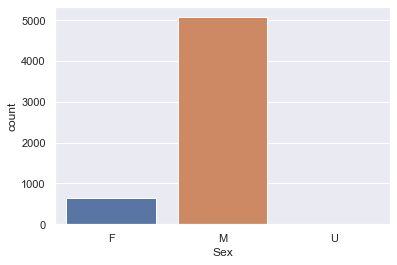

In [1295]:
sns.countplot(x=db.Sex)

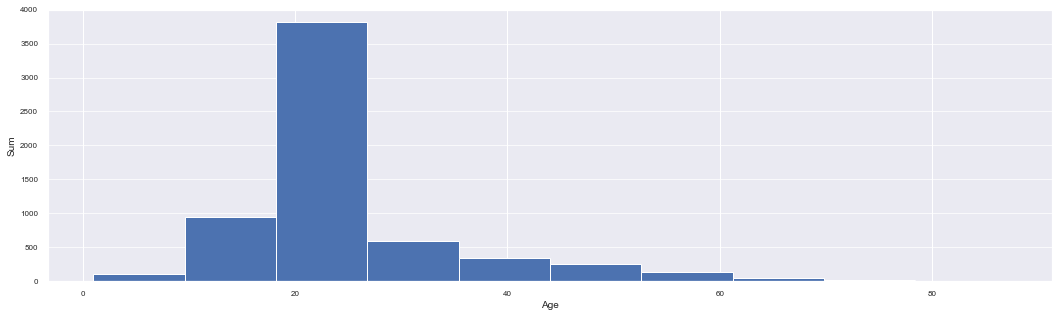

In [1296]:
plt.figure(figsize=[18,5])
plt.hist(db['Age'])
plt.xticks(fontsize=8) 
plt.yticks(fontsize=8)
plt.xlabel('Age',fontsize=10)
plt.ylabel('Sum',fontsize=10)
plt.grid(axis='y', alpha=0.75)

### Conclusions: average range of ages is arround 20-30 years all and the most part of the accidents happen to men. Maybe it's because of the activity, let's see later.

## 14. Fatal (Y/N)

In [1297]:
set(db['Fatal (Y/N)'])

{'2017', 'M', 'N', 'UNKNOWN', 'Y', nan, 'y'}

In [1298]:
db['Fatal (Y/N)'] = db['Fatal (Y/N)'].str.replace('y', 'Y')
db['Fatal (Y/N)']=db['Fatal (Y/N)'].replace(['2017','UNKNOWN','M'], 'U')
#db['Fatal (Y/N)'] = db['Fatal (Y/N)'].fillna('U')

In [1299]:
# This is a list with the indexes of the rows which have NaN values in the column "Fatal"
rows_missing_FATAL = list(db[(db["Injury"].isna()== False) & (db["Fatal (Y/N)"].isna())].index)
len(rows_missing_FATAL)

528

In [1300]:
def InjFatal (value):
    value=str(value)
    if "fatal" in value.lower():
        return True
    else:
        return False

In [1301]:
db.Injury.map(InjFatal)

0       False
1       False
2       False
3       False
4       False
        ...  
6297     True
6298     True
6299     True
6300     True
6301     True
Name: Injury, Length: 6275, dtype: bool

In [1302]:
db[~db['Injury'].map(InjFatal) & db["Fatal (Y/N)"].isnull()].loc[:,"Fatal (Y/N)"]="Y"
db

C:\Users\pinil\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,original order
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6303
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6302
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6301
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,26,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6300
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,26,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,26,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6
6298,ND.0004,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,26,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,5
6299,ND.0003,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,26,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,4
6300,ND.0002,1883-1889,0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,26,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,3


In [1303]:
db[db['Injury'].map(InjFatal) & db["Fatal (Y/N)"].isnull()]["Fatal (Y/N)"]="Y"
db

<ipython-input-1303-1a52710b66d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db[db['Injury'].map(InjFatal) & db["Fatal (Y/N)"].isnull()]["Fatal (Y/N)"]="Y"


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,original order
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6303
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6302
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6301
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,26,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6300
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,26,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,26,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6
6298,ND.0004,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,26,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,5
6299,ND.0003,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,26,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,4
6300,ND.0002,1883-1889,0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,26,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,3


In [1304]:
#if db.Injury.map(InjFatal)==True and db["Fatal (Y/N)"]==None:
    #db["Fatal (Y/N)"]="Y"
#elif db["Fatal (Y/N)"]==None:
    #db["Fatal (Y/N)"]="N"       

In [1305]:
null_rows_Fatal = db['Fatal (Y/N)'].isnull().sum()
print("Null rows Fatal", null_rows_Fatal)

Null rows Fatal 535


## 15. Type

In [1306]:
set(db['Type'])

{'Boat',
 'Boating',
 'Boatomg',
 'Invalid',
 'Provoked',
 'Questionable',
 'Sea Disaster',
 'Unprovoked',
 nan}

In [1307]:
db['Type'] = db['Type'].fillna('Not confirmed')
db['Type'] = db['Type'].str.replace('Boating', 'Boat')
db['Type'] = db['Type'].str.replace('Boatomg', 'Boat')
db['Type'] = db['Type'].str.replace('Invalid', 'Not confirmed')
db['Type'] = db['Type'].str.replace('Questionable', 'Not confirmed')

In [1308]:
set(db['Type'])

{'Boat', 'Not confirmed', 'Provoked', 'Sea Disaster', 'Unprovoked'}

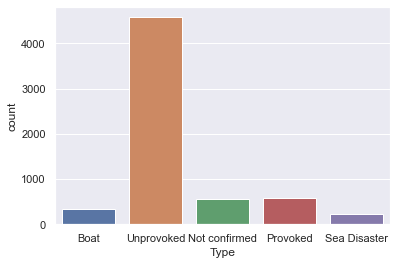

In [1309]:
ax = sns.countplot(x="Type", data=db)

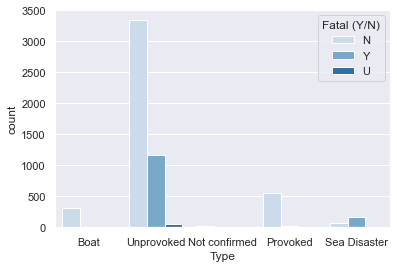

In [1310]:
sns.countplot(x=db.Type,
              hue=db['Fatal (Y/N)'],
              palette="Blues")

## 16. Country

In [1311]:
set(db['Country'])

{'ADMIRALTY ISLANDS',
 'AFRICA',
 'ALGERIA',
 'AMERICAN SAMOA',
 'ANDAMAN / NICOBAR ISLANDAS',
 'ANDAMAN ISLANDS',
 'ANGOLA',
 'ANTIGUA',
 'ARGENTINA',
 'ARUBA',
 'ASIA?',
 'ATLANTIC OCEAN',
 'AUSTRALIA',
 'AZORES',
 'BAHAMAS',
 'BAHREIN',
 'BANGLADESH',
 'BARBADOS',
 'BAY OF BENGAL',
 'BELIZE',
 'BERMUDA',
 'BRAZIL',
 'BRITISH ISLES',
 'BRITISH NEW GUINEA',
 'BRITISH VIRGIN ISLANDS',
 'BRITISH WEST INDIES',
 'BURMA',
 'Between PORTUGAL & INDIA',
 'CANADA',
 'CAPE VERDE',
 'CARIBBEAN SEA',
 'CAYMAN ISLANDS',
 'CENTRAL PACIFIC',
 'CEYLON',
 'CEYLON (SRI LANKA)',
 'CHILE',
 'CHINA',
 'COLUMBIA',
 'COMOROS',
 'COOK ISLANDS',
 'COSTA RICA',
 'CRETE',
 'CROATIA',
 'CUBA',
 'CURACAO',
 'CYPRUS',
 'Coast of AFRICA',
 'DIEGO GARCIA',
 'DJIBOUTI',
 'DOMINICAN REPUBLIC',
 'ECUADOR',
 'EGYPT',
 'EGYPT / ISRAEL',
 'EL SALVADOR',
 'ENGLAND',
 'EQUATORIAL GUINEA / CAMEROON',
 'FALKLAND ISLANDS',
 'FEDERATED STATES OF MICRONESIA',
 'FIJI',
 'FRANCE',
 'FRENCH POLYNESIA',
 'Fiji',
 'GABON',
 'GEORGIA'

In [1312]:
db['Country']=db['Country'].replace(['MALDIVAS'],'MALDIVES')
db['Country']=db['Country'].replace(['INDIAN OCEAN?'],'INDIAN OCEAN')
db['Country']=db['Country'].replace(['ANDAMAN / NICOBAR ISLANDAS'], 'ANDAMAN ISLANDS')
db['Country']=db['Country'].replace(['Fiji'], 'FIJI')
db['Country']=db['Country'].replace(['RED SEA?','READ SEA / INDIAN OCEAN'], 'READ SEA')
db['Country']=db['Country'].replace(['ST. MAARTIN'], 'ST. MARTIN')
db['Country']=db['Country'].replace(['SUDAN?'], 'SUDAN')
db['Country']=db['Country'].replace(['UNITED ARAB EMIRATES (UAE)'], 'UNITED ARAB EMIRATES')
db['Country']=db['Country'].replace(['WESTERN SAMOA'], 'SAMOA')
db['Country']=db['Country'].replace(['TOBAGO'], 'TRINIDAD & TOBAGO')
db['Country']=db['Country'].replace(['SOLOMON ISLANDS / VANUATU'], 'SOLOMON ISLANDS')
db['Country']=db['Country'].replace(['ST HELENA, British overseas territory'], 'ST HELENA')
db['Country']=db['Country'].replace(['MALDIVE ISLANDS'], 'MALDIVAS')
db['Country']=db['Country'].replace(['READ SEA','RED SEA / INDIAN OCEAN'], 'RED SEA')
db['Country']=db['Country'].replace(['Coast of AFRICA'], 'AFRICA')
db['Country']=db['Country'].replace(['France'], 'FRANCE')
db['Country']=db['Country'].replace(['Mozambique'], 'MOZAMBIQUE')
db['Country']=db['Country'].replace(['REUNION ISLAND'], 'REUNION')

In [1313]:
db[(db.Country.isna()) & (db.Area.isna()== False) & (db.Location.isna()==False)][["Country", "Area", "Location"]]

,Country,Area,Location
3387,NaN,Caribbean Sea,Between St. Kitts & Nevis
4266,NaN,Between Comores & Madagascar,Geyser Bank
4498,NaN,Caribbean Sea,Between Cuba & Costa Rica
5020,NaN,French Southern Territories,Île Saint-Paul
6137,NaN,St Helena,Landing Place


In [1314]:
rows_missing_Countries = list(db[(db.Country.isna()) & (db.Area.isna()== False) & (db.Location.isna()==False)].index)
rows_missing_Countries

[3387, 4266, 4498, 5020, 6137]

In [1315]:
input_Countries= ["Saint Kitts and Nevis", "Mozambique", "Cuba", "France", "ST HELENA"]

In [1316]:
def filling(data, indexes, values, col_name):
    j=0
    for i in indexes:   
        db.at[ i, col_name] = values[j]
        j = j+1

In [1317]:
filling(db, rows_missing_Countries, input_Countries, "Country")

In [1318]:
db[(db.Country.isna()) & (db.Area.isna()== False) & (db.Location.isna()==False)][["Country", "Area", "Location"]]

,Country,Area,Location


In [1319]:
db[(db.Country.isna()) & (db.Area.isna()) & (db.Location.isna()==False)][["Country", "Area", "Location"]]


,Country,Area,Location
3605,NaN,NaN,Florida Strait
4639,NaN,NaN,225 miles east of Hong Kong
5425,NaN,NaN,Near the equator
5810,NaN,NaN,Santa Cruz
6155,NaN,NaN,Carlisle Bay
6206,NaN,NaN,In a river feeding into the Bay of Bengal


In [1320]:
rows_missing_Countries2 = list(db[(db.Country.isna()) & (db.Area.isna()) & (db.Location.isna()==False)].index)
rows_missing_Countries2

[3605, 4639, 5425, 5810, 6155, 6206]

In [1321]:
input_Countries2= ["USA", "CHINA", " ", "USA", "ANTIGUA", "INDIA"]
filling(db, rows_missing_Countries2, input_Countries2, "Country")
db[(db.Country.isna()) & (db.Area.isna()== False) & (db.Location.isna()==False)][["Country", "Area", "Location"]]

,Country,Area,Location


In [1322]:
db[(db.Country.isna()) & (db.Area.isna()==False) & (db.Location.isna())][["Country", "Area", "Location"]]

,Country,Area,Location
2956,NaN,English Channel,NaN
4018,NaN,"Between Timor & Darwin, Australia",NaN
4231,NaN,Near the Andaman & Nicobar Islands,NaN
4700,NaN,Off South American coast,NaN
4712,NaN,300 miles east of St. Thomas (Virgin Islands),NaN
5612,NaN,Mediterranean Sea,NaN
5742,NaN,Gulf of California,NaN
5808,NaN,Western Banks,NaN
6175,NaN,Ionian Sea,NaN
6177,NaN,Ionian Sea,NaN


In [1323]:
rows_missing_Countries3 = list(db[(db.Country.isna()) & (db.Area.isna()==False) & (db.Location.isna())].index)
rows_missing_Countries3

[2956, 4018, 4231, 4700, 4712, 5612, 5742, 5808, 6175, 6177]

In [1324]:
input_Countries3= ["", "AUSTRALIA", "INDIA","USA","VIRGIN ISLANDS","SPAIN", "USA","","SICILIA","SICILIA"]
filling(db, rows_missing_Countries3, input_Countries3, "Country")
db[(db.Country.isna()) & (db.Area.isna()==False) & (db.Location.isna())][["Country", "Area", "Location"]]

,Country,Area,Location


In [1325]:
null_cols(db['Country'])

array([0.46215139])

In [1326]:
rows_missing_Countries = list(db[(db.Country.isna()) & (db.Area.isna()== False) & (db.Location.isna()==False)].index)
rows_missing_Countries

[]

## 18. Date/Year

In [1327]:
print(set(db['Date']))

{'Reported 26-Oct-1946', '08-Jul-1964', '05-Feb-1962', 'Reported 25-Nov-1971', '12-Mar-1961', '01-Sep-1868', 'Reported 29-Mar-1911', '03-Nov-1985', '13-Sep-2003', '03-Sep-2015', ' 25-Sep-2013', '08-Jul-2006', '02-Dec-2006', '14-Jul-1966', '26-Aug-1935', 'Reported 28-Dec-1898', '10-Mar-2015', '10-Jul-1958', ' 04-Sep-2010', '12-Aug-1975', '15-Oct-1962', '05-Sep-2007', 'Early 1900s', '04-Jul-1999', '24-Feb-1934', 'Reported 25-Dec-1888', '29-Jan-1941', '1984', '1898 (soon after the close of the Spanish-American War)', '  05-Oct-1985', '20-Sep-2007', '29-Jul-2006', '02-Jun-1964', '08-Sep-2004', '29-Aug-2013', 'Woirld War II', 'Reported 21-Mar-1938', '1850', '20-Jan-1997', '04-Sep-1999', '    22-Jul-2013', '24-Sep-2005', '11-Aug-2013', '28-Feb-1959', '05-Nov-1958', '01-Jan-1912', '22-Apr-2007', '13-Sep-2009', '22-Apr-1926', '09-Jul-2000', '03-Mar-2002', '15-Jul-2003', '17-Jun-1964', '12-Jul-2000', '08-Nov-1984', '07-Jan-1934', '09-Apr-1995', '20-Oct-2014', '26-Oct-1911', '29-Dec-2009', '30-N

In [1328]:
#Case Number has data format
db['Case Number'].sample(n=20)

891       2011.07.30
4451      1951.02.01
5107      1928.04.09
3987      1960.06.05
2318      1996.02.05
            ...     
4335    1954.07.04.R
2930      1983.07.15
4752    1941.00.00.f
147     2017.04.29.c
911     2011.06.14.R
Name: Case Number, Length: 20, dtype: object

In [1329]:
print(db['Date'].dtypes)

object


In [1330]:
try:
    db['Year_']=[d[0:4] for d in db['Case Number']]
except:
    db['Year_']='00'
try:
    db['Month']=[d[5:7] for d in db['Case Number']]
except:
    db['Month']='00'
try:
    db['Day']=[d[8:10] for d in db['Case Number']]
except:
    db['Day']='00'

In [1331]:
db['Year_'].sample(n=20)

1325    2007
939     2011
4655    1944
147     2017
922     2011
        ... 
2255    1997
4289    1955
4366    1953
2608    1991
1148    2009
Name: Year_, Length: 20, dtype: object

In [1332]:
db['Month'].sample(n=20)

500     09
3584    03
5802    01
2374    07
3346    00
        ..
1123    05
2363    08
5438    05
4198    05
602     11
Name: Month, Length: 20, dtype: object

In [1333]:
db['Day'].sample(n=20)

4697    13
2073    14
2090    06
4687    00
463     29
        ..
1573    27
5516    00
3895    02
5881    15
5843    09
Name: Day, Length: 20, dtype: object

In [1334]:
db[['Year','Year_']].sample(n=20)

,Year,Year_
4676,1943,1943
1895,2001,2001
4069,1959,1959
817,2012,2012
6001,1855,1855
...,...,...
1151,2009,2009
2320,1996,1996
6019,1852,1852
3926,1961,1961


In [1335]:
pd.set_option('precision', 0)

In [1336]:
print(set(db['Year_']))

{'1907', '1873', '1875', '1638', '1903', '1914', '1955', '1930', '1911', '1881', '1876', '1862', '1753', '2003', '1896', '1844', '1979', '1893', '1748', '1801', '1865', '1902', '1733', '1918', '2009', '1868', '1987', '2014', '1974', '1940', '1923', '1957', '1827', '1910', '2007', '1985', '1805', '1812', '1968', '1904', '1836', '1864', '1832', '1806', '1783', '1885', '1860', '1788', '1867', '1996', '1855', '1815', '1988', '1986', '1837', '1700', '1915', '1937', '1830', '1905', '0077', '1823', '1921', '1853', '1863', '1797', '1929', '2012', '2015', '1973', '1972', '1931', '1878', '1950', '1925', '1751', '1874', '1963', '1998', '1841', '1912', '1984', '1999', '1826', '1898', '1871', '2011', '1877', '1993', '1989', '1880', '1848', '1966', '0000', '1924', '1891', '1949', '1933', '1994', '1642', '0005', '1983', '2002', '1861', '1938', '1975', '2001', '1969', '1932', '1948', '1892', '1791', '1872', '1784', '1742', '1870', '1811', '1858', '1834', 'ND-1', '1888', '1976', '1840', '1850', '1803',

In [1337]:
db.loc[db['Year_'].str.contains('(?i)ND'),'Year_']='00'

In [1338]:
print(set(db['Year_']))

{'1907', '1873', '1875', '1638', '1903', '1914', '1955', '1930', '1911', '1881', '1876', '1862', '1753', '2003', '1896', '1844', '1979', '1893', '1748', '1801', '1865', '1902', '1733', '1918', '2009', '1868', '1987', '2014', '1974', '1940', '1923', '1957', '1827', '1910', '2007', '1985', '1805', '1812', '1968', '1904', '1836', '1864', '1832', '1806', '1783', '1885', '1860', '1788', '1867', '1996', '1855', '1815', '1988', '1986', '1837', '1700', '1915', '1937', '1830', '1905', '0077', '1823', '1921', '1853', '1863', '1797', '1929', '2012', '2015', '1973', '1972', '1931', '1878', '1950', '1925', '1751', '1874', '1963', '1998', '1841', '1912', '1984', '1999', '1826', '1898', '1871', '2011', '1877', '1993', '1989', '1880', '1848', '1966', '0000', '1924', '1891', '1949', '1933', '1994', '1642', '0005', '1983', '2002', '1861', '1938', '1975', '2001', '1969', '1932', '1948', '1892', '1791', '1872', '1784', '1742', '1870', '1811', '1858', '1834', '1888', '00', '1976', '1840', '1850', '1803', '

In [1339]:
db['test'] = db['Year_']==(db['Year'])
db['test'].value_counts()

False    6275
Name: test, dtype: int64

In [1340]:
db.loc[db['Year_']!=(db['Year'])]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,original order,Year_,Month,Day,test
0,2018.06.25,25-Jun-2018,2018,Boat,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6303,2018,06,25,False
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6302,2018,06,18,False
2,2018.06.09,09-Jun-2018,2018,Not confirmed,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6301,2018,06,09,False
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,26,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6300,2018,06,08,False
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,26,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6299,2018,06,04,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,26,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6,00,05,,False
6298,ND.0004,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,26,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,5,00,04,,False
6299,ND.0003,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,26,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,4,00,03,,False
6300,ND.0002,1883-1889,0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,26,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,3,00,02,,False


In [1341]:
db[['Year','Year_']].sample(n=200)

,Year,Year_
3201,1975,1975
5841,1878,1878
3866,1961,1961
5622,1896,1896
4232,1956,1956
...,...,...
574,2014,2014
2675,1989,1989
3210,1975,1975
4894,1935,1935


In [1342]:
len(db['Year'])

6275

In [1343]:
len(db['Year_'])

6275

In [1344]:
print(db['Year'].dtypes)

float64


In [1345]:
print(db['Year_'].dtypes)

object


In [1346]:
len(db[db['Year']==0])

125

In [1347]:
len(db[db['Year_']==0])

0

### We choose "Year_"

In [1348]:
db ['Year_'] = db ['Year_'].astype(int)

In [1349]:
len(db[db['Year_']>1980])

3036

In [1350]:
db=db[db['Year_']>=1980]
db

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,original order,Year_,Month,Day,test
0,2018.06.25,25-Jun-2018,2018,Boat,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6303,2018,06,25,False
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6302,2018,06,18,False
2,2018.06.09,09-Jun-2018,2018,Not confirmed,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6301,2018,06,09,False
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,26,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6300,2018,06,08,False
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,26,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6299,2018,06,04,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3078,1980.01.05,05-Jan-1980,1980,Unprovoked,CHILE,Los Vilos,"Punta Negra, Pichidangui",Hookah Diving,Jose Larenas-Miranda,M,26,FATAL,Y,11h00,White shark,J. McCosker & A.C. Engana,1980.01.05-Miranda.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,3225,1980,01,05,False
3079,1980.00.00.d,Summer 1980,1980,Provoked,NORTH ATLANTIC OCEAN,NaN,Onboard swordfish trawler,Gaffing netted shark,Sidney Hallett,M,34,Arm lacerated by gaffed shark PROVOKED INCIDENT,N,NaN,1.8 m [6'] dogfish,"A. Resciniti, pp.105-106",1980.00.00.d-Hallett.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,3224,1980,00,00,False
3080,1980.00.00.c,1980s,1980,Not confirmed,GREECE,Island of Kos,NaN,Surfing,male,M,26,Knee bitten,NaN,NaN,Said to involve a white shark but shark involv...,MEDSAF,1980.00.00.c-NV-Greece.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,3223,1980,00,00,False
3081,1980.00.00.b,1980,1980,Not confirmed,SOUTH AFRICA,Eastern Cape Province,Bonza Bay,Spearfishing,Sean Mitchley,M,20,No injury; 2 m shark made threat display and i...,NaN,Early afternoon,Invalid,"P. Sachs, M. Levine, GSAF",1980.00.00.b-Mitchley.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,3222,1980,00,00,False


In [1351]:
db = db.reindex(columns=sorted(db.columns))

In [1352]:
db.sort_values(by='Year',ascending=True)

,Activity,Age,Area,Case Number,Country,Date,Day,Fatal (Y/N),Injury,Investigator or Source,Location,Month,Name,Sex,Species,Time,Type,Year,Year_,href formula,original order,pdf,test
2674,Scuba diving,35,NaN,1989.07.27,BERMUDA,27-Jul-1989,27,NaN,FATAL,"LA Times, 7/28/1989",NaN,07,Russian male,M,Shark involvement suspected but not confirmed,NaN,Not confirmed,1969,1989,http://sharkattackfile.net/spreadsheets/pdf_di...,3629,1989.07.27-SovietDiver.pdf,False
3082,Spearfishing,26,Ha'api,1980.00.00.a,TONGA,1980s,00,N,Chest bitten,Dr. S. Fonea,Ha'ano Island,00,A male from Muitoa,M,NaN,AM,Unprovoked,1980,1980,http://sharkattackfile.net/spreadsheets/pdf_di...,3221,1980.00.00.a-Tonga.pdf,False
3061,Standing,22,Delaware,1980.07.23,USA,23-Jul-1980,23,N,"No injury, shark bit her bathing suit","Washington Post, 7/23/1980",Dewey Beach,07,Phyllis Riley,F,4' to 8' shark,Afternoon,Unprovoked,1980,1980,http://sharkattackfile.net/spreadsheets/pdf_di...,3242,1980.07.23-PhyllisRidley.pdf,False
3060,Body surfing,15,New Jersey,1980.07.27,USA,27-Jul-1980,27,N,Back bitten,J. Moffat; W. Ruderman,"Ocean City, Cape May County",07,Jeff Moffat,M,NaN,15h00,Unprovoked,1980,1980,http://sharkattackfile.net/spreadsheets/pdf_di...,3243,1980.07.27-Moffat.pdf,False
3059,Skin diving,26,Canary Islands,1980.07.26,SPAIN,26-Jul-1980,26,N,Thigh injured,C. Moore. GSAF,"San Juan de la Rambla, Tenerife",07,Fuentes Gonzalez Escualo,M,Blue shark,NaN,Unprovoked,1980,1980,http://sharkattackfile.net/spreadsheets/pdf_di...,3244,1980.07.26-Escualo.pdf,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,Surfing,37,Western Australia,2018.04.15.a,AUSTRALIA,15-Apr-2018,15,N,Lacerations to legs,"B.Myatt, GSAF","Cobblestones, Margaret River Area",04,Alejandro Travaglini,M,NaN,08h00,Unprovoked,2018,2018,http://sharkattackfile.net/spreadsheets/pdf_di...,6274,2018.04.15.a-Travaglini.pdf,False
28,Surfing,41,Western Australia,2018.04.15.b,AUSTRALIA,15-Apr-2018,15,N,Laceration to right thigh,"B.Myatt, GSAF","Lefthanders, Margaret River Area",04,Jason Longrass,M,NaN,NaN,Unprovoked,2018,2018,http://sharkattackfile.net/spreadsheets/pdf_di...,6275,2018.04.15.b-Longrass.pdf,False
26,Swimming,54,Hua Hin,2018.04.15.d,THAILAND,15-Apr-2018,15,N,Lacerations to foot and ankle,"Straits Times, 4/16/2018",Sai Noi Beach,04,Werner Danielsen,M,Juvenile bull shark,NaN,Unprovoked,2018,2018,http://sharkattackfile.net/spreadsheets/pdf_di...,6277,2018.04.15.d-Thailand.pdf,False
0,Paddling,57,California,2018.06.25,USA,25-Jun-2018,25,N,"No injury to occupant, outrigger canoe and pad...","R. Collier, GSAF","Oceanside, San Diego County",06,Julie Wolfe,F,White shark,18h00,Boat,2018,2018,http://sharkattackfile.net/spreadsheets/pdf_di...,6303,2018.06.25-Wolfe.pdf,False


In [1353]:
db.head(3)

,Activity,Age,Area,Case Number,Country,Date,Day,Fatal (Y/N),Injury,Investigator or Source,Location,Month,Name,Sex,Species,Time,Type,Year,Year_,href formula,original order,pdf,test
0,Paddling,57,California,2018.06.25,USA,25-Jun-2018,25,N,"No injury to occupant, outrigger canoe and pad...","R. Collier, GSAF","Oceanside, San Diego County",06,Julie Wolfe,F,White shark,18h00,Boat,2018,2018,http://sharkattackfile.net/spreadsheets/pdf_di...,6303,2018.06.25-Wolfe.pdf,False
1,Standing,11,Georgia,2018.06.18,USA,18-Jun-2018,18,N,Minor injury to left thigh,"K.McMurray, TrackingSharks.com","St. Simon Island, Glynn County",06,Adyson McNeely,F,NaN,14h00 -15h00,Unprovoked,2018,2018,http://sharkattackfile.net/spreadsheets/pdf_di...,6302,2018.06.18-McNeely.pdf,False
2,Surfing,48,Hawaii,2018.06.09,USA,09-Jun-2018,09,N,Injury to left lower leg from surfboard skeg,"K.McMurray, TrackingSharks.com","Habush, Oahu",06,John Denges,M,NaN,07h45,Not confirmed,2018,2018,http://sharkattackfile.net/spreadsheets/pdf_di...,6301,2018.06.09-Denges.pdf,False


In [1354]:
db['Decade'] = pd.cut(db.Year_,4, labels=range(1980,2020,10))
db.Decade

0       2010
1       2010
2       2010
3       2010
4       2010
        ... 
3078    1980
3079    1980
3080    1980
3081    1980
3082    1980
Name: Decade, Length: 3071, dtype: category
Categories (4, int64): [1980 < 1990 < 2000 < 2010]

## 19. Activity

In [1355]:
set(db['Activity'])

{'',
 '"Riding waves on a board"',
 '14 m prawn trawler New Venture capsized  & sank in heavy seas Three people in the water',
 "16' catamaran capsized previous night, occupants stayed with wreckage until morning, then attempted to swim ashore",
 '2 boats capsized',
 'Abalone diving using Hookah (near calving whales)',
 'Abalone diving using Hookah (resting on the surface)',
 "Accidentally stood on hooked shark's tail before attempting to gut it",
 'Adrift after ditching plane in the sea',
 'Adrift in a life jacket',
 'Adrift on refugee raft',
 'Air Disaster',
 'Air Disaster - Piper aircraft crashed into the sea, killing all on board',
 'Air disaster. Flash Airlines Boeing 737 crashed into the Red Sea',
 'Attempting to Kite surf from Egypt to Saudi Arabia',
 'Attempting to attract dolphins',
 'Attempting to catch a crocodile',
 'Attempting to chase shark out to sea',
 'Attempting to drive shark away from sailing regatta',
 'Attempting to fix motor',
 'Attempting to free the shark',
 'A

In [1356]:
db['Activity']=db['Activity'].replace(['Attempting to Kite surf from Egypt to Saudi Arabia',
 'Attempting to attract dolphins',
 'Attempting to catch a crocodile',
 'Attempting to chase shark out to sea',
 'Attempting to drive shark away from sailing regatta',
 'Attempting to illegally enter the USA',
 'Attempting to lasso a shark',
 "Attempting to lasso shark's tail",
 'Attempting to remove fishing net from submerged object',
 'Attempting to rescue a shark',
 'Attempting to rescue an injured & beached shark',
 'Attempting to retreive a dinghy','Removing fish from a trap','Tagging sharks',
 'Tandem surfing',
 'Teasing a shark',
 'Tech diving ',
 'The 426-ton cargo ship Mia, laden with cement, capsized in heavy seas ',
 'The Christie V sank on 11/6/1988, survivors were adrift on a dinghy',
 'The MV Dona Marilyn sank in Typhoon Unsang with the loss of 389 lives',
 'The inter-island ferry Vula sank in heavy weather',
 'Touching a shark',
 'Touching sharks',
 'Towing her sister on plastic ski board',
 'Towing rubber dinghy',
 'Transatlantic Rowing',
 'Treading water',
 'Treading water/ Surfing',
 'Unknown',
 'Vessel caught fire & capsized, survivors in the water',
 'Wading to shore from his boat',
 'Wakeboarding',
 'Washing hands',
 'Washing his feet',
 'Washing sand off a speared fish',
 'Watching seals',
 'Wind surfing',
 'Windsurfing (urinating on his board)',
 'Wrangling a shark',
 'Yacht race',
 'Removing hook from shark',
 'Removing shark from net',
 'Removing shark from tank in nightclub ',
 'Rescuing',
 'Resting on body board',
 'Resting on surfboard',
 'Returning to shore, collided with shark',
 'Reviving a sedated shark',
 'Riding floatation device','Hiking on the beach',
 'Holding onto an inflatable boat','Attempting to Kite surf from Egypt to Saudi Arabia',
  'Attempting to fix motor',
 'Attempting to free the shark',
 'Attempting to illegally enter the USA',
 'Attempting to lasso a shark',
 "Attempting to lasso shark's tail",
 'Attempting to remove fishing net from submerged object',
 'Attempting to rescue a shark',
 'Attempting to rescue an injured & beached shark',
 'Attempting to retreive a dinghy', 
 'Inflatable boat',
 'Inspecting teeth of supposedly dead (hooked & shot) shark',
 'Investigating shark sighting',
 'Jet skiing',
 'Jumped into the water',
 'Jumped into the water from a cliff',
 'Jumped off rocks into white water',
 'Jumped off surfboard & landed on the shark',
 'Jumping',
 'Jumping in the waves',
 'Kakaying','Shark Fishing', 
 'Shark tagging',
 'Shark watching',
 'Shell Diving',
 'Shell diving',
 'Shipwrecked',
 'Shrimping',
 "Sinking of the 40' Esperanza off St. Maartin with 36 refugees on board",
 'Sinking of the cargo ship Mark Jason',
 'Sinking of the ferryboat Bongbong 1',
 'Sinking of the ferryboat Don Juan',
 'Sitting in the water',
 'Sitting on surfboard',
 'Sittting in water with his child',
 'Skimboarding',
 'Skin diving',
 'Skindiving',
 'Sleeping in anchored boat',
 'Spearfishing',
 'Splashing',
 'Splashing / wading',
 'Stamding',
 'Stand-Up Paddleboarding',
 'Standing',
 'Standing ',
 'Standing / Snorkeling',
 'Standing / Surfing',
 'Standing / Wading',
 'Standing alongside surfboard',
 'Standing in inner tube',
 'Standing in waist-deep water, helping his father tend a gill net containing dead fish',
 'Standing or boogie boardin',
 'Standing, collecting sea stars',
 'Standing, holding shark pup',
 'Standing, stepped on shark',
 'Steinhart Aquarium',
 'Surf skiing',
 'Surf skiing ', 
 'Killing  sharks',
 'Kite','Dragging stranded shark into deeper water',
 'Drift fishing',
 'Dropping anchor',
 'Exercising his dog in the shallows',
 'Feeding fish',
 'Feeding prawns to captive sharks',
 'Feeding stingrays?',
 'Fell into the water',
 'Fell off aircraft carrier',
 'Fell off banana boat',
 'Fell onto dead shark','Measuring sharks',
 'Moving a shark in a net ',
 'Murder',
 'Murder victim',
 'NSB Meshing',
 'Night Surfing',
 'Night bathing',
 'Night diving',
 'Observing a shark feeding on a carcass of a humpback whale',
 'On a float',
 "On board 51' fishing vessel One Ki",
 "Onboard 21' powerboat that capsized in rough seas",
 'Oyster fishing',
 'Paddle Boarding',
 'Petting a shark',
 'Petting captive sharks',
 'Photo shoot',
 'Photographing fish',
 'Photographing the shark',
 'Fell overboard  from the Taiwanese fishing trawler Lien Cheng Feu ',
 'Ferry boat Dona Paz with 4431 passengers exploded & caught fire when she collided with an  oil tanker ',
 'Ferry boat sank',
 'Filming',
 'Filming a documentary',
 'Finning the shark that bit him','Canoe with 3 men onboard sank',
 'Capsized fishing boat',
 'Catching sardines',
 'Chumming for sharks',
 'Chumming for white sharks',
 'Cleaning fish',
 'Collecting beche-de-mer',
 'Competing in the Woodvale Atlantic Rowing Race',
 'Crabbing',
 'Crayfishing',
 "Crouching in 2' of water",
 'Cruising',
 'Dived naked into the water on a bet','14 m prawn trawler New Venture capsized  & sank in heavy seas Three people in the water',
 "16' catamaran capsized previous night, occupants stayed with wreckage until morning, then attempted to swim ashore",
 '2 boats capsized',
 'Abalone diving using Hookah (near calving whales)',
 "Accidentally stood on hooked shark's tail before attempting to gut it ",
 'Adrift after ditching plane in the sea',
 'Adrift in a life jacket',
 'Adrift on refugee raft',
 'Air Disaster','Tagging sharks', 'Capsized fishing boat',
 'Tandem surfing',
 'Teasing a shark',
 'Tech diving ',
 'The 426-ton cargo ship Mia, laden with cement, capsized in heavy seas ',
 'The Christie V sank on 11/6/1988, survivors were adrift on a dinghy',
 'The MV Dona Marilyn sank in Typhoon Unsang with the loss of 389 lives',
 'The inter-island ferry Vula sank in heavy weather',
 'Touching a shark',
 'Touching sharks',
 'Towing her sister on plastic ski board',
 'Towing rubber dinghy',
 'Transatlantic Rowing',
 'Treading water',
 'Treading water/ Surfing',
 'Unknown',
 'Vessel caught fire & capsized, survivors in the water',
 'Wading to shore from his boat',
 'Wakeboarding',
 'Washing hands',
 'Washing his feet',
 'Washing sand off a speared fish',
 'Watching seals',
 'Wind surfing',
 'Windsurfing (urinating on his board)',
 'Wrangling a shark',
 'Yacht race',
 'Air Disaster - Piper aircraft crashed into the sea, killing all on board',
 'Air disaster. Flash Airlines Boeing 737 crashed into the Red Sea',
 'Attempting to Kite surf from Egypt to Saudi Arabia',
 'Attempting to chase shark out to sea',
 'Attempting to drive shark away from sailing regatta',
 'Attempting to fix motor',
 'Attempting to free the shark',
 'Attempting to illegally enter the USA',
 'Attempting to lasso a shark',
 "Attempting to lasso shark's tail",
 'Attempting to remove fishing net from submerged object',
 'Attempting to rescue a shark',
 'Attempting to rescue an injured & beached shark',
 'Attempting to retreive a dinghy',
 'Bathing',
 'Batin',
 "16' catamaran capsized previous night, occupants stayed with wreckage until morning, then attempted to swim ashore",
 'Adrift in a life jacket',
 'Adrift on refugee raft',
 'Air Disaster',
 'Board sailing',
 'Longline fishing for sharks',
 'Lying atop surfboard',
 'Lying on surfboard',
 'Lying on surfboard & paddling',
 "Lying prone in 2' of water",
 'Marathon swimming',
 'Measuring sharks',
 'Moving a shark in a net ',
 'Murder',
 'Murder victim',
 'NSB Meshing',
 'Night Surfing',
 'Night bathing','Chumming for sharks',
 'Chumming for white sharks',
 'Night diving','Fishingat',
 'Five men on makeshift raft after their 10 m fishing boat  capsized and sank in rough seas. Survivors rescued after  7.5 hours in the water',
 'Floating',
 'Fly fishing',
 'Foundering of the Israeli freighter Mezada',
 'Free-diving',
 'Gaffing netted shark',
 'Grabbing shark for a selfie',
 'Hand feeding sharks',
 'Kite-Boarding',
 'Observing a shark feeding on a carcass of a humpback whale',
 'On a float',
 "On board 51' fishing vessel One Ki",
 "Onboard 21' powerboat that capsized in rough seas",
 'Oyster fishing',
 'Paddle Boarding',
 'Petting a shark',
 'Petting captive sharks',
 'Gaffing netted shark',
 'Grabbing shark for a selfie',
 'Hand feeding sharks'
 'Boat capsized?',
 'Boogie Boarding',
 'Bottom fishing for lingcod & had hooked a fish',
 'Canoeing',
 'Casting a net',
 'Commercial spearfishing',
 'Conducting research',
 'Crawling',"During a shark fishing tournament, the 18' Boatem was capsized by waves, throwing 3 men into the water ",
 'Feeding sharks',
 'Fell from cliff while fishing & disappeared in strong current',
 "Fell off surfboard 20' from shore",
 "Filming 5' blue shark",'Kayak Fishing',
 'Kayak fishing',
 'Kayaking',
 'Kayaking ',
 'Kayaking / Fishing','Wading or swimming',
 'Wading to shore after surfing',
 'Wading with surfboard',
 'Wading, knocked down & swept away by large waves',
 'Wading, when he stepped on the shark',
 'Wading?',
 'Walking','Moving a shark in a net ',
 'Murder',
 'Kneeling in the water',
 'Lifesaving drill',
 'Lobster fishing',
 'Lobstering',
 'Longline fishing for sharks',
 'Lying atop surfboard',
 'Lying on surfboard',
 'Lying on surfboard & paddling',
 "Lying prone in 2' of water",
 'Marathon swimming',
 'Measuring sharks',
 'Moving a shark in a net ',
 'Murder',
 'Murder victim',
 'NSB Meshing',
 'Night Surfing',
 'Night bathing',
 'Night diving',
 'Observing a shark feeding on a carcass of a humpback whale',
 'On a float',
 "On board 51' fishing vessel One Ki",
 "Onboard 21' powerboat that capsized in rough seas",
 'Oyster fishing',
 'Paddle Boarding',
 'Petting a shark',
 'Petting captive sharks',
 'Murder victim',
 'NSB Meshing',
 'Night bathing',
 'Night diving',
 'Observing a shark feeding on a carcass of a humpback whale',
 'On a float',
 "On board 51' fishing vessel One Ki",
 "Onboard 21' powerboat that capsized in rough seas",
 'Oyster fishing',
 'Paddle Boarding',
 'Petting a shark',
 'Petting captive sharks', 
 'Watching the shark feeding on a dead pinniped',
 'Water-skiing',
 'Wreck / Technical diving',
 "Zosimo & his son, Jeffrey Popa, failed to return from overnight fishing trip in a 14' boat, Boat apparently sank, debris recovered but his son & boat were never found"],'Several')
 

In [1357]:
db['Activity']=db['Activity'].replace(['Swimming ',
 'Swimming & snorkeling',
 'Swimming (using a float)',
 'Swimming /  Whale Watching',
 'Swimming /  boogie boarding',
 'Swimming / Body Surfing',
 'Swimming / Body surfing',
 'Swimming / Wading',
 'Swimming / jumping off a jetty',
 'Swimming / shipwreck',
 'Swimming / snorkeling',
 'Swimming / surfing',
 'Swimming / treading water',
 'Swimming after being swept into sea by a large wave',
 'Swimming after boat became disabled',
 'Swimming after falling overboard',
 'Swimming alongside NOAA research vessel Discoverer',
 'Swimming back from anchored sailboat',
 'Swimming behind sailboat',
 'Swimming breast stoke',
 'Swimming from makeshift raft  to life vest after fishing boat sank',
 'Swimming from shore to anchored sailboat',
 'Swimming from the New Venture ',
 'Swimming in canal',
 'Swimming in fish tank',
 'Swimming in strong current with 3 others when he disappeared',
 'Swimming near pod of whales',
 'Swimming or Snorkeling',
 'Swimming or boogie boarding',
 'Swimming or paddle boarding',
 'Swimming or snorkeling',
 'Swimming or surfing',
 'Swimming out to porpoises ',
 'Swimming to shore from boat or kayak',
 'Swimming to shore from capsized kayak',
 'Swimming to shore with floatioon devices after boat engine conked out',
 'Swimming with boogie board',
 'Swimming with dolphins',
 'Swimming with mask & snorkel',
 'Swimming with pod of dolphins',
 'Swimming, after falling off towed kneeboard',
 'Swimming, attempting to rescue a girl  believed to be drowning',
 'Swimming, poaching abalone',
 'Swimming, poaching perlemoen',
 'Swimming, towing a kayak',
 'Swimming, towing surfboard',
 'Swimming, wearing black wetsuit & swim fins'],'Swimming')

In [1358]:
db['Activity']=db['Activity'].replace(['Walking / surfing',
 'Walking in shallows',
 'Walking in surf',
 'Walking out of the water after surfing',
 'Walking, carrying surfboard & stepped on shark'],'Walking')

In [1359]:
db['Activity']=db['Activity'].replace(['Spearfishing ',
 'Spearfishing & diving for paua',
 'Spearfishing & holding catch',
 'Spearfishing (Free diving)',
 'Spearfishing (free diving)',
 'Spearfishing / Free diving',
 'Spearfishing / free diving',
 'Spearfishing / night diving',
 'Spearfishing on scuba',
 'Spearfishing on scuba & transferring fish onto a stringer',
 'Spearfishing using scuba & trailing a string of bleeding fish',
 'Spearfishing, but swimming at surface',
 'Spearfishing, but swimming on surface',
 'Spearfishing, carrying his catch',
 'Spearfishing, holding mesh bag with speared fish',
 'Spearfishing/ filming'],'Spearfishing')

In [1360]:
db['Activity']=db['Activity'].replace(['Sailboarding, fell into water 100 yards outside the breakwater',
 'Sailing',
 'Sailing on catamaran & fell into the water'],'Sailing')

In [1361]:
db['Activity']=db['Activity'].replace(['Playing / jumping',
 'Playing / standing',
 'Playing in knee-deep water',
 'Playing in the surf',
 'Playing in the surf with his 2 dogs',
 'Playing in the water',
 'Playing on a sandbar',
 'Playing soccer in the water',
 'Playing volleyball with friends',
 'Playing with an air mattress'],'Playing')

In [1362]:
db['Activity']=db['Activity'].replace(['Paddle Skiing',
 'Paddle boarding',
 'Paddle-boarding',
 'Paddle-skiing',
 'Paddle-surfing',
 'Paddleskiing',
 'Paddling',
 'Paddling on kneeboard',
 'Paddling on surfboard',
 'Paddling on surfboard or body board'],'Paddle Boarding')

In [1363]:
db['Activity']=db['Activity'].replace([ 'Floating',
 'Floating ',
 'Floating face-down in knee-deep water',
 'Floating in tube',
 'Floating near boat & observing bioluminesce',
 'Floating on a raft',
 'Floating on air mattress',
 'Floating on his back',
 'Floating on inner tube after diving for lobster',
 'Floating on raft'],'Floating')

In [1364]:
db['Activity']=db['Activity'].replace(['Wade-fishing',
 'Wading',
 'Wading / Surfing',
 'Wading / fishing & carrying a bag of fish',
 'Wading in school of baitfish',
 'Wading near a fishing net',
 'Wading or swimming',
 'Wading to shore after surfing',
 'Wading with surfboard',
 'Wading, knocked down & swept away by large waves',
 'Wading, when he stepped on the shark',
 'Wading?'],'Wade Fishing')

In [1365]:
db['Activity']=db['Activity'].replace(['Boogie Boarding','Kite Boarding',
 'Kite Surfing',
 'Kite boarding',
 'Kite surfing',
 'Kiteboarding'],'Kite')

In [1366]:
db['Activity']=db['Activity'].replace(['Kayak fishing for sharks',
 'Kayaking (returning from spearfishing)',
 'Kayaking or Wave skiing','Kayak Fishing',
 'Kayak fishing',
 'Kayaking',
 'Kayaking ',
 'Kayaking / Fishing'],'Kayak')

In [1367]:
db['Activity']=db['Activity'].replace(['Spearfishing',"During a shark fishing tournament, the 18' Boatem was capsized by waves, throwing 3 men into the water", 'Collecting beche-de-mer','Wade Fishing',
 'Wade fishing',
 'Wade-fishing','Shark fishing',
 'Shark fishing on the Don Agustín-VI. ',
 'Shark fishing on the Ricardo Astorga','Fishing ',
 'Fishing (Drowned 2-Apr-2002)',
 'Fishing (illegally)',
 "Fishing - 'tag & release'",
 'Fishing / Wading',
 'Fishing / washing bait off hands',
 'Fishing boat swamped in storm',
 'Fishing for blue sharks',
 'Fishing for lobsters',
 'Fishing for octopus',
 'Fishing for sharks',
 'Fishing for shrimp',
 'Fishing for snapper','pêcheur de bichiques',
 'Fishing for squid','Catching sardines',
 'Fishing for squid aboard the trawler Shikishima-Maru when the shark leapt into the boat',
 'Fishing for tarpon',
 'Fishing for tuna',
 'Fishing for whiting',
 'Fishing for yellowtail, Seriola quinqueradiata',
 'Fishing from Surfboard', 
 'Lobster fishing',
 'Lobstering',
 'Fishing from a kayak','Shark Fishing',
 'Shark fishing on the Don Agustín-VI.',
 'Fishing from prawn trawler',
 'Fishing from rocks, swept out to sea by large wave & treading water',
 'Fishing from surfski',
 'Fishing in Alabama Deep Fishing Rodeo',
 'Fishing in knee-deep water',
 'Fishing on a boat',
 'Fishing, fell from rocks & disappeared',
 'Fishing, removing the shark from his line',
 "Fishing, standing in 2' of water",
 "Fishing, stepped on hooked shark's head",'Fisherman',
 'Fishing','Preparing to fish for jack-mackerel',
 'Fishing ','Crayfishing',
 'Fishing for sharks',
 'Fishing for snapper',
 'Fishing for squid', 'Commercial spearfishing',
 'Fishing for tarpon','Fell from cliff while fishing & disappeared in strong current'
 'Fishing from Surfboard',
 'Fishing from rocks, swept out to sea by large wave & treading water',
 'Fishing in Alabama Deep Fishing Rodeo',
 'Fishing, fell from rocks & disappeared','Fly fishing'
 'Fishing, removing the shark from his line',
 "Fishing, stepped on hooked shark's head"],'Fishing')

In [1368]:
db['Activity']=db['Activity'].replace(['Tech diving','Cage Diving','SCUBA diving'
 'Wading',
 'Wading / fishing & carrying a bag of fish',
 'Wading in school of baitfish',
 'Wading near a fishing net','Scuba Diving',
 'Scuba Diving for scallops',
 'Scuba diving & filming',
 'Scuba diving (submerged riding a scooter)',
 'Scuba diving / culling lionfish',
 'Scuba diving at seal colony',
 'Scuba diving for abalone',
 'Scuba diving for bivalves',
 'Scuba diving in aquarium tank',
 'Scuba diving, but swimming on surface',
 'Scuba diving, hand feeding sharks','Snorkeling',
 'Snorkeling (filming the sardine run)',
 'Snorkeling on surface','Tech diving'
 'Snorkeling – hunting crayfish and abalone',
 'Snorkeling, carrying a speared fish in her hand',
 'Snorkeling, possibly holding a fish','Free diving & spearfishing',
 'Free diving & spearfishing ',
 'Free diving / modeling','Shark diving',
 'Free diving / spearfishing',
 'Free diving / spearfishing, ',
 'Free diving Spearfishing',
 'Free diving for scallops',
 'Free diving for trochus',
 'Free diving with a pod of dolphins',
 'Free-diving''Diving ',
 'Diving & fishing with net',
 'Diving (shell maintenance)',
 'Diving / Filming',
 'Diving / Kissing the shark',
 'Diving / fishing','Diving, gathering shellfish',
 'Diving for Abalone',
 'Diving for abalone',
 'Diving for beche-de-mer',
 'Diving for crayfish',
 'Diving for lobsters','Hookah Diving',
 'Hookah diving','Snorkeling – hunting crayfish and abalone',
 'Hookah diving for pen shells ',
 'In waist-deep water',
 'In water with diving seabirds',
 'Diving for pen shells',
 'Diving for sea urchins',
 "Diving in Sharkey's Reef restaurant’s aquarium",
 'Diving in aquarium display tank',
 'Diving in tuna net','Scallop diving (using surface-supplied air & a POD)',
 'Scallop diving on hookah',
 "Diving to untangle a crab trap line from boat's propeller",
 'Diving, but on the surface when bitten by the shark',
 'Diving, feeding sharks','Cage Diving'
 'Diving, gathering shellfish',
 'Diving, photographing sharks','Hookah diving for abalone',
 'Hookah diving for abalone (descending)',
 'Hookah diving for sea urchins','Commercial diver (submerged or treading water)', 'Abalone diving using Hookah (resting on the surface)','Scuba Diving for lobster (at surface)',
 'Scuba diving','SCUBA Diving',
 'SCUBA diving',                                       
 'Scuba diving ',
 'Scuba diving & spearfishing',
 'Scuba diving (ascending using scooter)',
 'Scuba diving (but on surface)',
 'Scuba diving (submerged)',
 'Scuba diving, reportedly also spearfishing','Free diving',
 'Free diving  & spearfishing (submerged)',
 'Free diving / spearfishing,',
 'Free-diving',   'Shell Diving',
 'Shell diving',
 'Free diving ','Free-diving'
 'Free diving  & spearfishing (submerged)',
 'Free diving & spearfishing (ascending)',
 'Free diving & spearfishing (descending)',
 'Free diving , but surfacing',
 'Free diving / Photographing pilot whales',
 'Free diving / spearfishing, from paddleboard & floating on the surface',
 'Free diving for abalone',
 'Free diving for abalone (ascending)','Dived naked into the water on a bet',
 'Free diving for abalone from Zodiac (submerged)',
 'Freediving for seashells''Cage Diving','Diving ',
 'Diving / Kissing the shark',
 "Diving in Sharkey's Reef restaurant’s aquarium",'Standing / Snorkeling',
 'Diving in aquarium display tank',
 "Diving to untangle a crab trap line from boat's propeller",
 'Freediving for seashells',
 'Hookah diving for pen shells'],'Diving')

In [1369]:
db['Activity']=db['Activity'].replace(['Floating ',
 'Floating face-down in knee-deep water',
 'Floating in tube',
 'Floating near boat & observing bioluminesce',
 'Floating on a raft',
 'Floating on air mattress',
 'Floating on his back',
 'Floating on inner tube after diving for lobster',
 'Floating on raft'],'Floating')

In [1370]:
db['Activity']=db['Activity'].replace(['Boogie Boarding','SUP',
 'SUP Foil boarding','Body boarding','Stand-Up Paddleboarding'
 'Body boarding ','Paddle Boarding',
 'Body boarding or surfing',
 'Body-boarding',
 'Bodyboarding',
 'Bodysurfing','Body Boarding',
 'Body-boarding','Boogie boarding',
 'Boogie boarding / wading',
 'Boogie boarding or Surfing',
 'Boogie boarding, kicked at object in the water',
 'Boogie-boarding / swimming'],'Boogie Boarding')

In [1371]:
db['Activity']=db['Activity'].replace(['Body boarding',
 'Body boarding or surfing'],'Body Boarding')

In [1372]:
db['Activity']=db['Activity'].replace(['Swimming out to porpoises','Swimming',
 'Swimming ',
 'Swimming (using a float)',
 'Swimming /  boogie boarding','Bathing',
 'Batin',
 'Swimming / Body surfing',
 'Swimming / Wading',
 'Swimming / snorkeling',
 'Swimming / surfing',
 'Swimming after falling overboard',
 'Swimming behind sailboat',
 'Swimming from makeshift raft  to life vest after fishing boat sank',
 'Swimming from shore to anchored sailboat',
 'Swimming in fish tank',
 'Swimming in strong current with 3 others when he disappeared',
 'Swimming near pod of whales',
 'Swimming or boogie boarding',
 'Swimming or paddle boarding',
 'Swimming out to porpoises ',
 'Swimming to shore from boat or kayak',
 'Swimming with boogie board',
 'Swimming with dolphins',
 'Swimming with mask & snorkel',
 'Swimming with pod of dolphins',
 'Swimming, towing a kayak',
 'Swimming, towing surfboard','Swimming from the New Venture',
 'Swimming, wearing black wetsuit & swim fins','Jumped into the water',
 'Jumped into the water from a cliff',
 'Jumped off rocks into white water',
 'Jumped off surfboard & landed on the shark',
 'Jumping',
 'Jumping in the waves',],'Swimming')

In [1373]:
db['Activity']=db['Activity'].replace([
 'Standing',
 'Standing alongside surfboard',
 'Standing in inner tube',
 'Standing in waist-deep water, helping his father tend a gill net containing dead fish',
 'Standing or boogie boardin',
 'Standing, collecting sea stars',
 'Standing, holding shark pup',
 'Standing, stepped on shark','Walking',
 'Walking / surfing',
 'Walking in shallows',
 'Walking in surf',
 'Walking out of the water after surfing',
 'Walking, carrying surfboard & stepped on shark'],'Walking')

In [1374]:
db['Activity']=db['Activity'].replace(['Surf-skiing','Wind surfing',
 'Windsurfing (urinating on his board)','Lying atop surfboard',
 'Lying on surfboard',
 'Lying on surfboard & paddling','Surfing & filming dolphins',
 'Surfing (or body boarding)',
 'Surfing (or sailboarding)','Kitesurfing'
 'Surfing amid a shoal of sharks',
 'Surfing with dolphins','Body surfing',
 'Body surfing or Boogie boarding',
 'Body surfing or body boarding',
 'Body surfing, stood up on sandbar','Kitesurfing',
 'Body surfing?','Standing / surfing','Body surfing',
 'Body surfing, stood up on sandbar','Windsurfing',
 'Windsurfing, but sitting on his board','Surf fishing',
 'Surf fishing / wading',
 'Surf paddling','Night Surfing'
 'Surf-skiing','Surfing ','Surfing amid a shoal of sharks',
 'Surfing or body surfing','Scurfing (surfboard being  towed behind a boat)',
 'Surfng','Surfing & dangling foot in water amid baitfish',
 'Surfing (lying prone on his board)',
 'Surfing (sitting on his board)',
 'Surfing / Swimming', 'Wading / Surfing'
 'Surfing or body surfing','Fishingat','Racing ski',
 'Five men on makeshift raft after their 10 m fishing boat  capsized and sank in rough seas. Survivors rescued after  7.5 hours in the water',
 'Surfing, but lying prone on his board',
 'Surfing, but standing in water alongside board','"Riding waves on a board"',
 'Surfing, fell off surfboard & stepped on the shark.','Fishingat',
 'Five men on makeshift raft after their 10 m fishing boat  capsized and sank in rough seas. Survivors rescued after  7.5 hours in the water',
 'Surfing, lying on surfboard',
 'Surfing, paddling seawards','Standing / Surfing',
 'Standing / Wading',
 'Standing alongside surfboard''Attempting to Kite surf from Egypt to Saudi Arabia',
 'Surfing, paddling shorewards','Riding waves on a board','Surfing / Wading','Surfing, sitting on board','Body surfing or Boogie boarding','Surfing / treading water','Surfing, collided with shark','Body surfing or body boarding','Body surfing?'], 'Surfing')

In [1375]:
db['Activity']=db['Activity'].replace(['Photo shoot',
 'Photographing fish',
 'Photographing the shark'"Filming 5' blue shark",
 'Filming a documentary'],'Filming')

In [1376]:
db['Activity']=db['Activity'].replace(['The 426-ton cargo ship Mia, laden with cement, capsized in heavy seas',"Scientific research (Dr. Sonny Gruber's student)",'Swept out to sea by the tsunami, she clung  to a log for 24 hours','Fell from cliff while fishing & disappeared in strong current',
 'Fell into the water',
 'Fell off aircraft carrier','Chumming for sharks',
 'Chumming for white sharks',
 'Cleaning fish', 'Boeing 757 enroute from Porta Plata plunged into the sea',
 'Fell off banana boat','Swept out to sea by the tsunami, she clung  to a log for 24 hours'
 "Fell off surfboard 20' from shore",'Ran into the water',
 'Fell onto dead shark', 'Accident','Fell overboard  from the Taiwanese fishing trawler Lien Cheng Feu',
 'Ferry boat Dona Paz with 4431 passengers exploded & caught fire when she collided with an  oil tanker',
 "Accidentally stood on hooked shark's tail before attempting to gut it",'Sea Disaster',
 'Sea disaster','Air Disaster','Removing hook from shark',
 'Removing shark from tank in nightclub','Sea disaster, foundering of the cargo vessle M/V Dorolonda',
 'Air Disaster - Piper aircraft crashed into the sea, killing all on board',
 'Air disaster. Flash Airlines Boeing 737 crashed into the Red Sea','Moving a shark in a net',
 'Sea disaster, foundering of the cargo vessle M/V Dorolonda,Boeing 757 enroute from Porta Plata plunged into the sea'],"Accident")

In [1377]:
db['Activity']=db['Activity'].replace(['Rowing an inflatable dinghy'],'Rowing')

In [1378]:
db['Activity']=db['Activity'].replace(['Cruising','Boat capsized?'],'Boat')

In [1379]:
db['Activity']=db['Activity'].replace(['Bottom fishing for lingcod & had hooked a fish'],'Fishing')

In [1380]:
set(db['Activity'])

{'',
 'Accident',
 'Boat',
 'Boogie Boarding',
 'Diving',
 'Fishing',
 'Floating',
 'Kayak',
 'Kite',
 'Playing',
 'Rowing',
 'Sailing',
 'Several',
 'Surfing',
 'Swimming',
 'Walking',
 nan}

## 20. Final database

In [1381]:
db.columns

Index(['Activity', 'Age', 'Area', 'Case Number', 'Country', 'Date', 'Day',
       'Fatal (Y/N)', 'Injury', 'Investigator or Source', 'Location', 'Month',
       'Name', 'Sex', 'Species', 'Time', 'Type', 'Year', 'Year_',
       'href formula', 'original order', 'pdf', 'test', 'Decade'],
      dtype='object')

In [1382]:
db.drop(['Year','Area','Month','test','Case Number','Name', 'Year_','Injury', 'Species', 'Day','Date','Time','pdf','original order','Investigator or Source','Location','href formula'], axis=1, inplace=True)

In [1383]:
#db.head()

### aplicar un método básico estadístico de pandas como .sum(), .count(), .max(), .min(), .mean(), .median() o .mode()

In [1384]:
#db.groupby(['Country']).get_group('USA')

In [1385]:
#db.groupby(['Country']).count()

In [1386]:
Countries_max=db.Country.value_counts()
Countries_max.head(10)

USA              1489
AUSTRALIA         509
SOUTH AFRICA      293
BRAZIL            102
BAHAMAS            80
REUNION            54
NEW ZEALAND        53
NEW CALEDONIA      39
MEXICO             32
EGYPT              23
Name: Country, dtype: int64

In [1387]:
db.isnull().sum()

Activity       161
Age              0
Country          2
Fatal (Y/N)    237
Sex            191
Type             0
Decade           0
dtype: int64

### New data base with USA as main countrie

In [1388]:
db=db.groupby(['Country']).get_group('USA')
db

,Activity,Age,Country,Fatal (Y/N),Sex,Type,Decade
0,Boogie Boarding,57,USA,N,F,Boat,2010
1,Several,11,USA,N,F,Unprovoked,2010
2,Surfing,48,USA,N,M,Not confirmed,2010
7,Fishing,52,USA,N,M,Unprovoked,2010
8,Several,15,USA,N,M,Unprovoked,2010
...,...,...,...,...,...,...,...
3060,Surfing,15,USA,N,M,Unprovoked,1980
3061,Several,22,USA,N,F,Unprovoked,1980
3062,Surfing,26,USA,N,M,Unprovoked,1980
3063,Surfing,26,USA,N,M,Unprovoked,1980


In [1389]:
db.groupby(['Decade']).count()

,Activity,Age,Country,Fatal (Y/N),Sex,Type
Decade,,,,,,
1980,194,203,203,185,192,203
1990,263,278,278,262,267,278
2000,464,482,482,454,467,482
2010,496,526,526,493,514,526


In [1390]:
db.describe(include = 'O').transpose()

,count,unique,top,freq
Activity,1417,13,Surfing,587
Country,1489,1,USA,1489
Fatal (Y/N),1394,3,N,1340
Sex,1440,3,M,1143
Type,1489,5,Unprovoked,1246


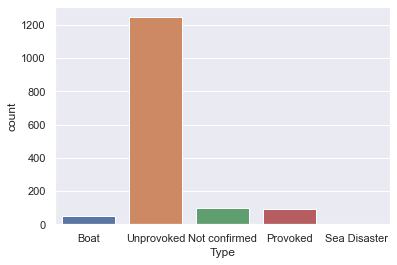

In [1391]:
ax = sns.countplot(x="Type", data=db)

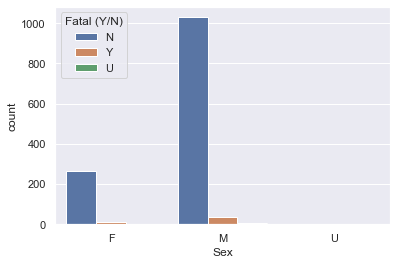

In [1392]:
ax = sns.countplot(x="Sex", hue="Fatal (Y/N)", data=db)

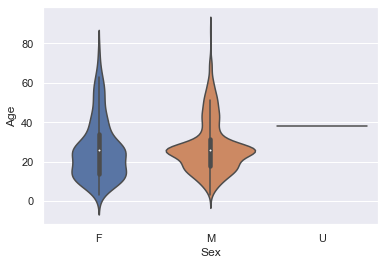

In [1393]:
sns.violinplot(x=db["Sex"], y=db["Age"])
sns.set(style="darkgrid")
plt.show()

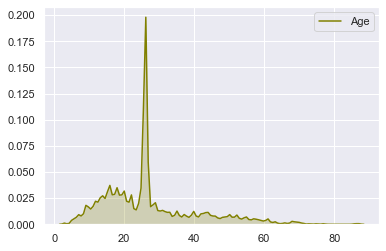

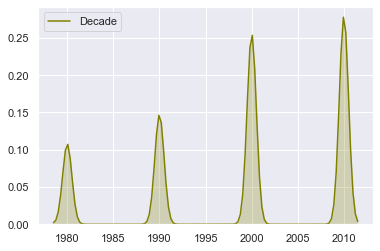

In [1394]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
# Large bandwidth
sns.kdeplot(db['Age'], shade=True, bw=0.5, color="olive")
plt.show()
sns.kdeplot(db['Decade'], shade=True, bw=0.5, color="olive")
plt.show()

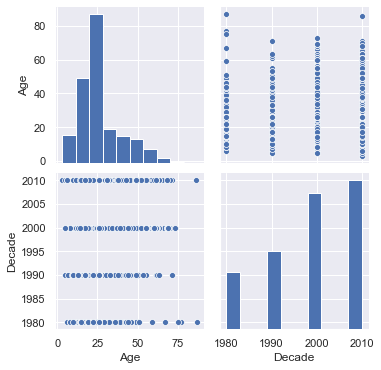

In [1395]:
sns.pairplot(db)

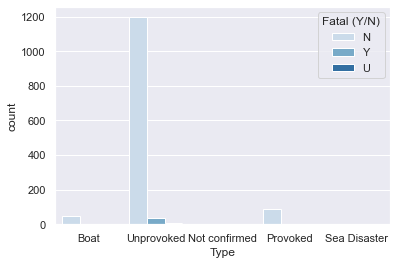

In [1396]:
sns.countplot(x=db.Type,
              hue=db['Fatal (Y/N)'],
              palette="Blues")

In [1397]:
#Unique values
counts = db.nunique()
counts

Activity       13
Age            73
Country         1
Fatal (Y/N)     3
Sex             3
Type            5
Decade          4
dtype: int64

In [1398]:
db=db.groupby(['Country']).get_group('USA')
db

,Activity,Age,Country,Fatal (Y/N),Sex,Type,Decade
0,Boogie Boarding,57,USA,N,F,Boat,2010
1,Several,11,USA,N,F,Unprovoked,2010
2,Surfing,48,USA,N,M,Not confirmed,2010
7,Fishing,52,USA,N,M,Unprovoked,2010
8,Several,15,USA,N,M,Unprovoked,2010
...,...,...,...,...,...,...,...
3060,Surfing,15,USA,N,M,Unprovoked,1980
3061,Several,22,USA,N,F,Unprovoked,1980
3062,Surfing,26,USA,N,M,Unprovoked,1980
3063,Surfing,26,USA,N,M,Unprovoked,1980


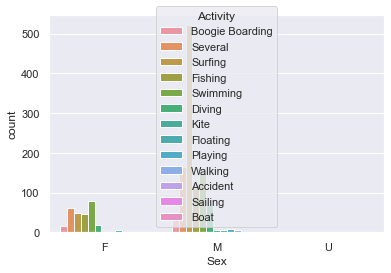

In [1399]:
ax = sns.countplot(x="Sex", hue="Activity", data=db)

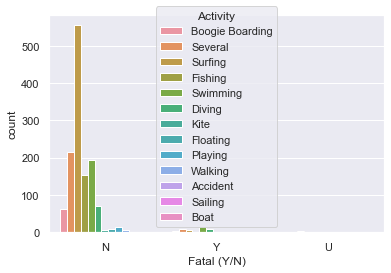

In [1400]:
ax = sns.countplot(x="Fatal (Y/N)", hue="Activity", data=db)

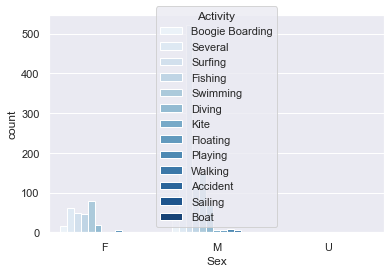

In [1401]:
sns.countplot(x=db['Sex'],
              hue=db['Activity'],
              palette="Blues")

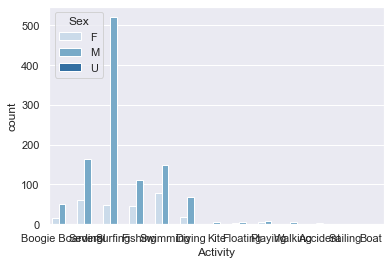

In [1402]:
sns.countplot(x=db['Activity'],
              hue=db['Sex'],
              palette="Blues")

### Most part of the injuries are unprovoked, making sur and to men because they practique more water activities. By decades the activities have increased.

# Pandas profilling report

In [1403]:
report = db.profile_report(sort='None', html={'style':{'full_width':True}})
report

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [1404]:
report.to_file(output_file="shark_attacks_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Save final db to csv

In [1405]:
db.to_csv("shark_attacks_final.csv")